In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"H:\Coffe_sales.csv")


In [3]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [4]:
df.shape

(3547, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [69]:
df['cash_type'].unique()

array(['card'], dtype=object)

In [6]:
# Ensure date is parsed
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
print(df.describe(include='all'))

        hour_of_day cash_type        money          coffee_name Time_of_Day  \
count   3547.000000      3547  3547.000000                 3547        3547   
unique          NaN         1          NaN                    8           3   
top             NaN      card          NaN  Americano with Milk   Afternoon   
freq            NaN      3547          NaN                  809        1205   
mean      14.185791       NaN    31.645216                  NaN         NaN   
min        6.000000       NaN    18.120000                  NaN         NaN   
25%       10.000000       NaN    27.920000                  NaN         NaN   
50%       14.000000       NaN    32.820000                  NaN         NaN   
75%       18.000000       NaN    35.760000                  NaN         NaN   
max       22.000000       NaN    38.700000                  NaN         NaN   
std        4.234010       NaN     4.877754                  NaN         NaN   

       Weekday Month_name  Weekdaysort    Monthsort

In [8]:
#SALES & REVENUE ANALYSIS

In [53]:
# Total revenue
total_revenue = int(df['money'].sum())
print(f"Total Revenue: {total_revenue:,} $")

Total Revenue: 112,245 $


In [54]:
# Average revenue per transaction
avg_revenue = round(df['money'].mean(), 2)
print(f"Avg Revenue per Order: {avg_revenue} $")

Avg Revenue per Order: 31.65 $


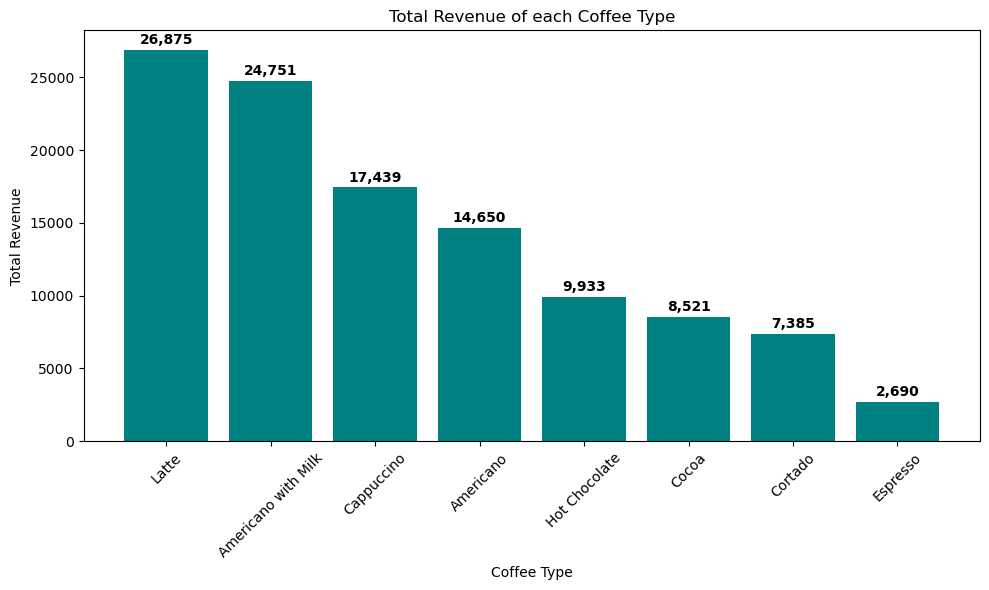

In [59]:
# Revenue by coffee type
rev_by_type = df.groupby("coffee_name")['money'].sum().sort_values(ascending=False)

fig, ax=plt.subplots(figsize=(10,6))
bars=ax.bar(rev_by_type.index, rev_by_type.values, color='teal')
for bar in bars:
    ax.annotate(format(bar.get_height(), ',.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', xytext=(0, 7),
                textcoords='offset points', fontsize=10, fontweight='bold', color='black')

ax.set_xlabel('Coffee Type')
ax.set_ylabel('Total Revenue')
ax.set_title('Total Revenue of each Coffee Type')
ax.set_xticks(range(len(rev_by_type.index)))
ax.set_xticklabels(rev_by_type.index, rotation=45)

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

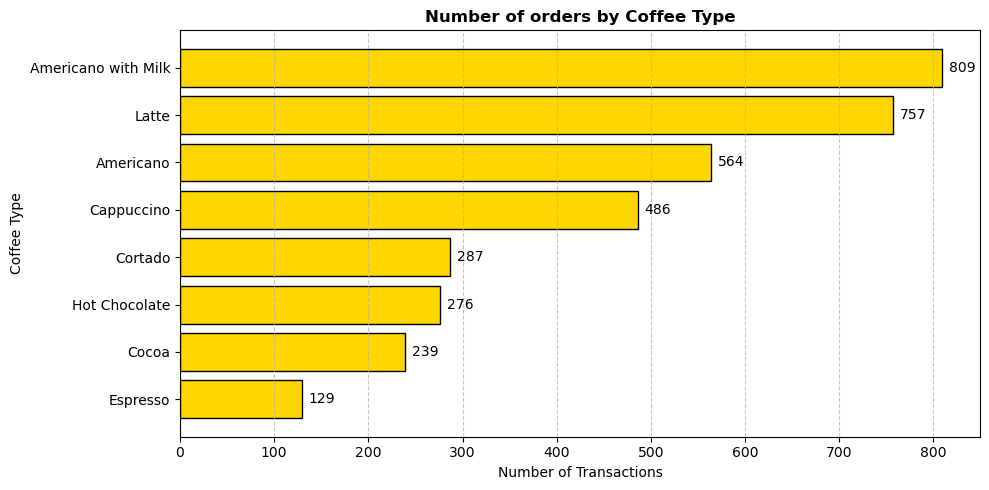

In [35]:
# Transactions per product
transactions_by_type = df['coffee_name'].value_counts().sort_values(ascending=True)


fig, ax=plt.subplots(figsize=(10,5))
bars= ax.barh(transactions_by_type.index, transactions_by_type.values, color='gold', edgecolor='black')
for bar in bars:
    ax.annotate(f'{bar.get_width()}',
               (bar.get_width(), bar.get_y()+bar.get_height()/2),
               xytext=(5,0), textcoords='offset points', ha='left', va='center',
               fontsize=10, color='black')

# Customize the plot
ax.set_title('Number of orders by Coffee Type', fontsize=12, fontweight='bold')
ax.set_xlabel('Number of Transactions', fontsize=10)
ax.set_ylabel('Coffee Type', fontsize=10)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

In [13]:
# Price variability (std dev)
price_variability = df.groupby("coffee_name")['money'].std().sort_values(ascending=False)
print(price_variability)


coffee_name
Cortado                2.093669
Espresso               1.974016
Americano with Milk    1.883843
Latte                  1.821834
Cappuccino             1.819232
Americano              1.676099
Hot Chocolate          1.437499
Cocoa                  1.233693
Name: money, dtype: float64


In [14]:
# 2. TIME-BASED ANALYSIS

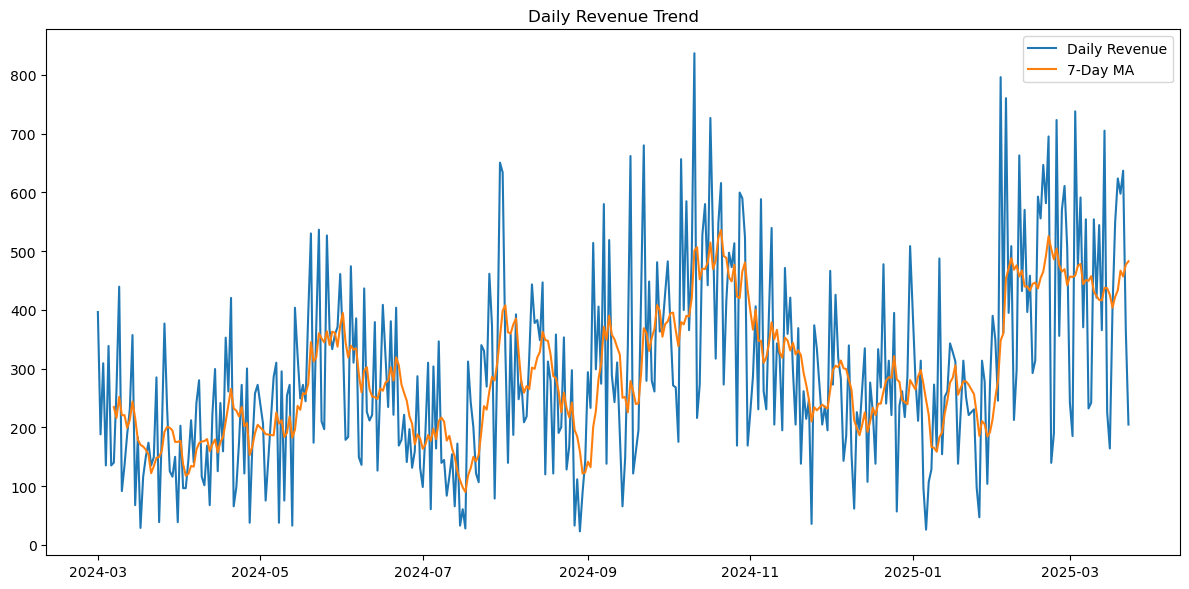

In [40]:
# Daily revenue trend
daily_rev = df.groupby(df['Date'])['money'].sum()
# 7-day moving average
daily_rev_ma = daily_rev.rolling(7).mean()

# Daily trend + moving average
plt.figure(figsize=(12,6))
plt.plot(daily_rev.index, daily_rev.values, label="Daily Revenue")
plt.plot(daily_rev_ma.index, daily_rev_ma.values, label="7-Day MA")
plt.legend()
plt.title("Daily Revenue Trend")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Total Revenue')

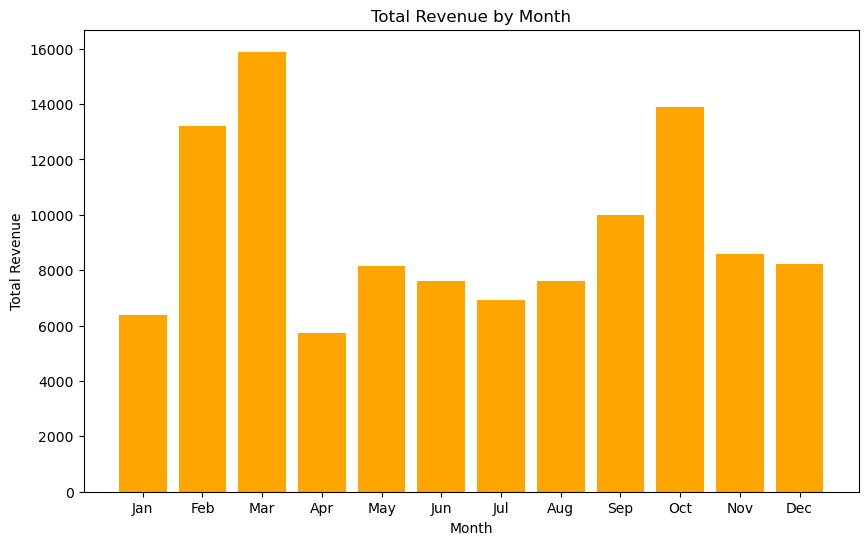

In [46]:
# Revenue by month
rev_month = df.groupby("Month_name")['money'].sum().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(rev_month.index, rev_month.values, color='orange')
ax.set_title('Total Revenue by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Total Revenue')

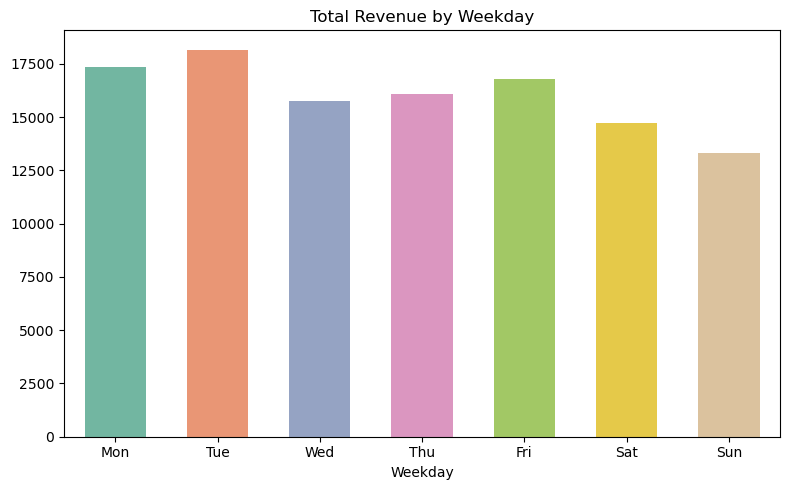

In [60]:
# Revenue by weekday
rev_weekday = df.groupby("Weekday")['money'].sum().reindex(
    ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
palette = sns.color_palette("Set2", len(rev_weekday))
plt.figure(figsize=(8,5))
sns.barplot(x=rev_weekday.index, y=rev_weekday.values, width=0.6, palette=palette)
plt.title("Total Revenue by Weekday")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

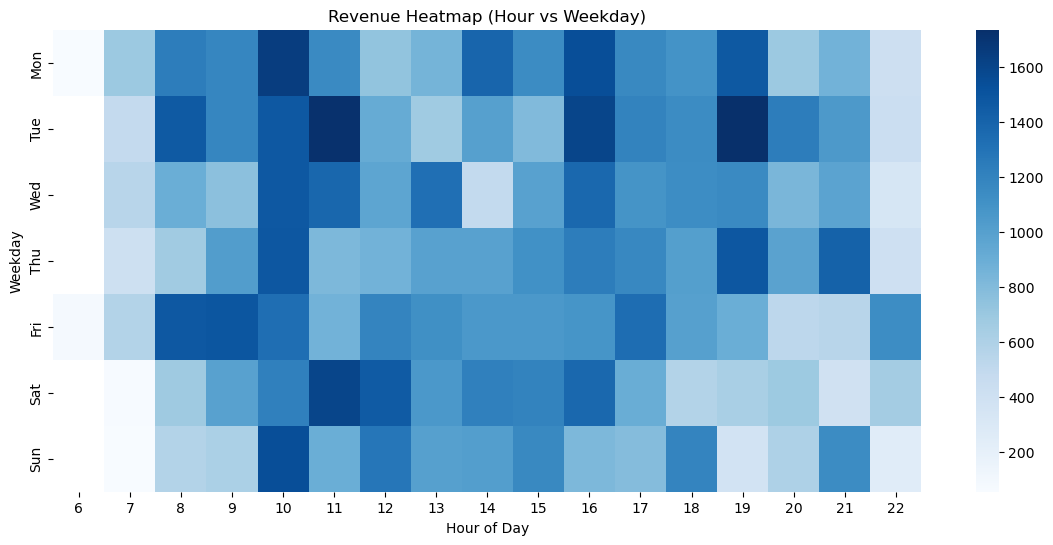

In [72]:
# Heatmap (hour vs weekday)
pivot = df.pivot_table(values='money', index='Weekday', columns='hour_of_day', aggfunc='sum')
pivot = pivot.reindex(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="Blues")
plt.title("Revenue Heatmap (Hour vs Weekday)")
plt.xlabel('Hour of Day')
plt.show()

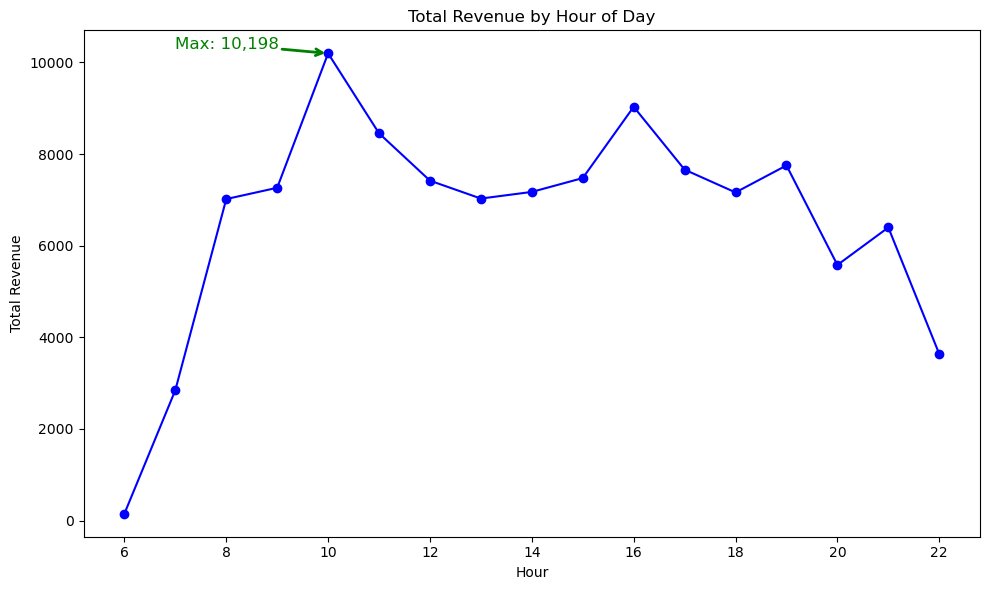

In [19]:
# Revenue by hour of day
rev_hour = df.groupby("hour_of_day")['money'].sum()
max_revenue=int(rev_hour.max())
max_hour=rev_hour.idxmax()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(rev_hour.index, rev_hour.values, marker='o', linestyle='-', color='blue', label='Hourly Total Revenue')
ax.annotate(f"Max: {max_revenue:,.0f}",
           xy=(max_hour,max_revenue),
             xytext=(max_hour - 3, max_revenue * 1.01),  # better placement
        arrowprops=dict(
        arrowstyle="->",     
        color="green",
        shrinkA=0,            
        shrinkB=2,
        lw=2),
           fontsize=12, color='green',
            )
plt.title("Total Revenue by Hour of Day")
plt.xlabel('Hour')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

In [25]:
# Rush hour detection
rush_hours = rev_hour.sort_values(ascending=False).head(5)
print("Peak Hours:", rush_hours)

Peak Hours: hour_of_day
10    10198.52
16     9031.84
11     8453.10
19     7751.96
17     7659.76
Name: money, dtype: float64


''

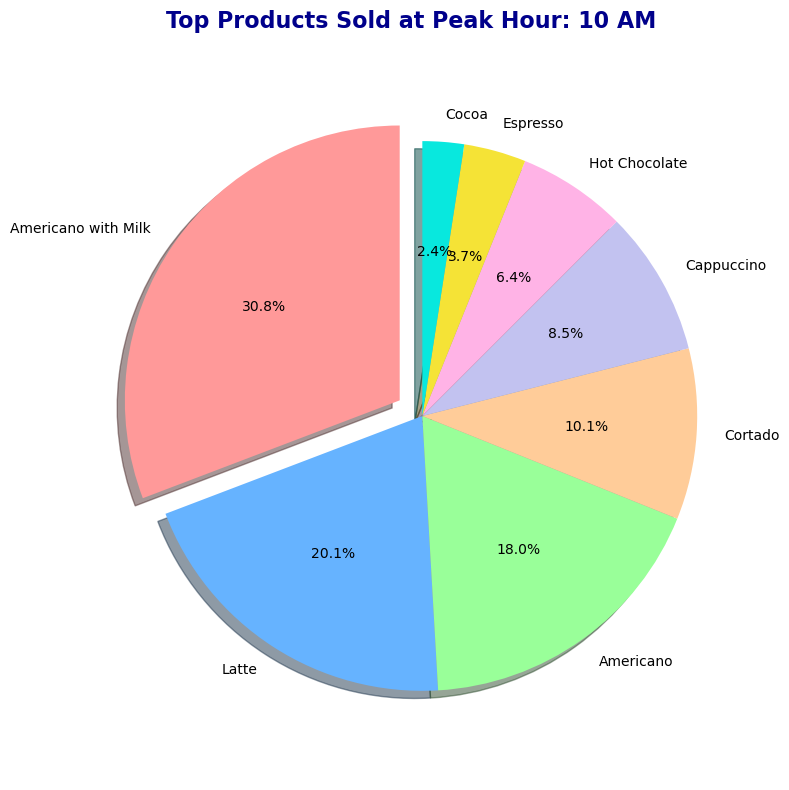

In [26]:
# Stock planning — top products by peak hour
peak_hour = rush_hours.index[0]
top_items_peak_hour = df[df['hour_of_day']==peak_hour]['coffee_name'].value_counts()
explode_values = [0.1 if i == 0 else 0 for i in range(len(top_items_peak_hour))]
color = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#F5E336', '#08E8DE']

fig, ax=plt.subplots(figsize=(8,8))
ax.pie(top_items_peak_hour, labels=top_items_peak_hour.index, explode=explode_values, colors=color, shadow=True, autopct='%1.1f%%', startangle=90)
ax.set_title('Top Products Sold at Peak Hour: 10 AM', fontsize=16, fontweight='bold', color='darkblue')
ax.axis('equal')

# Show the plot
fig.tight_layout()
;

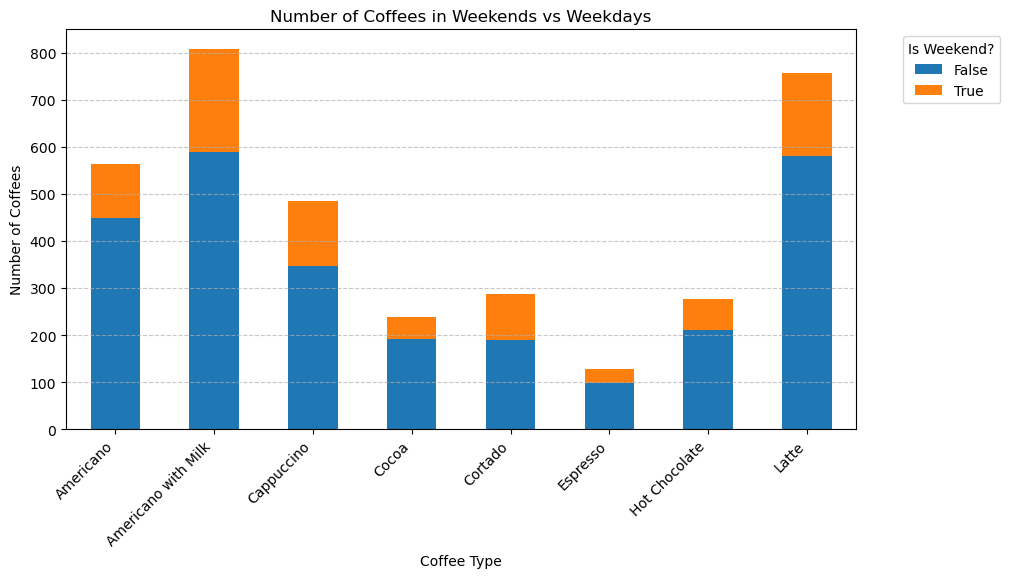

In [21]:
# Coffee popularity weekend vs weekday
df["is_weekend"] = df['Weekday'].isin(["Sat","Sun"])
weekend_comparison = df.groupby(["coffee_name", "is_weekend"]).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
weekend_comparison.plot(kind='bar', stacked=True, width=0.5, ax=ax)
ax.legend(title='Is Weekend?', bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
# Add a grid to the y-axis
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_title('Number of Coffees in Weekends vs Weekdays')
ax.set_xlabel('Coffee Type')
ax.set_ylabel('Number of Coffees')
ax.tick_params(axis='x', rotation=45)
ax.set_xticklabels(weekend_comparison.index, ha='right')
# Show the plot
plt.show()

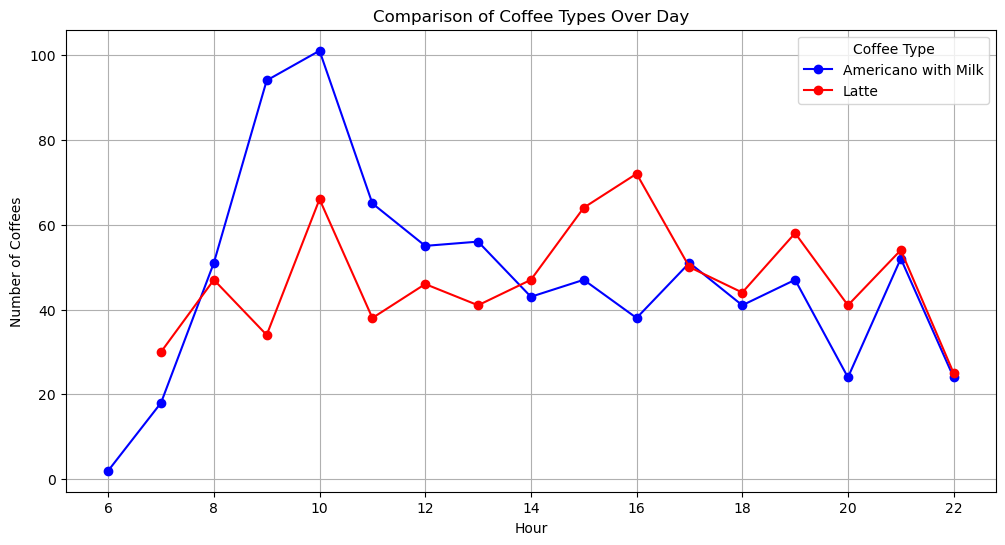

In [33]:
#Filter the dataframe for specific coffee types
filtered_df=df[df['coffee_name'].isin(['Americano with Milk', 'Latte'])]

# Distribution of drinks across hours
drink_by_hour = filtered_df.groupby(["hour_of_day","coffee_name"]).size().unstack()

fig, ax=plt.subplots(figsize=(12,6))

ax.plot(drink_by_hour.index, drink_by_hour['Americano with Milk'], marker='o', color='blue', label='Americano with Milk')
ax.plot(drink_by_hour.index, drink_by_hour['Latte'], marker='o', color='red', label='Latte')

ax.set_title('Comparison of Coffee Types Over Day')
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Coffees')

# Add a legend with a title
ax.legend(title='Coffee Type')

# Add a grid
ax.grid(True)

# Show the plot
plt.show()

In [24]:
# 7. OPERATIONAL & BUSINESS INSIGHTS

In [27]:
# Product performance by month
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['Month_name'] = pd.Categorical(df['Month_name'], categories=order, ordered=True)

prod_month = (
    df.groupby(["Month_name","coffee_name"])
      .size()
      .unstack(fill_value=0)
      .sort_index() )


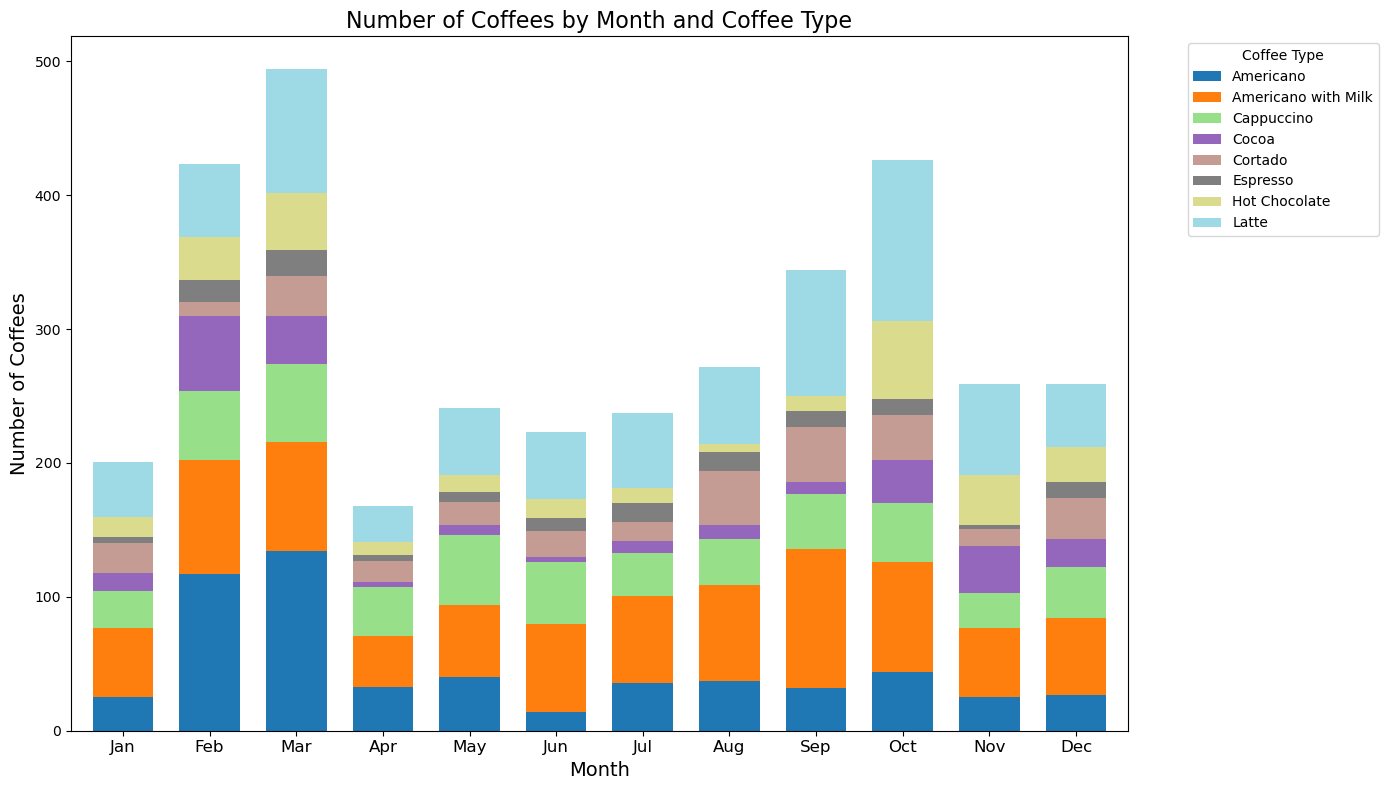

In [43]:
fig, ax=plt.subplots(figsize=(14,8))
prod_month.plot(kind='bar', stacked=True,  ax=ax, width=0.70, colormap='tab20')
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Coffees', fontsize=14)
ax.set_title('Number of Coffees by Month and Coffee Type', fontsize=16)

# Add the legend
ax.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate the x-ticks for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)

# Adjust layout
fig.tight_layout()